#### Classification Problem

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### First, the (simulated) data.

In [2]:

# red class  =  class 0

x0 = np.random.normal(2, 1, (60, 1))
y0 = np.random.normal(1, 1, (60, 1))

# green class  =  class 1

x1 = np.random.normal(5, 1, (70, 1))
y1 = np.random.normal(4, 1, (70, 1))

# blue class  =  class 2

x2 = np.random.normal(3, 1, (80, 1))
y2 = np.random.normal(7, 1, (80, 1))

# yellow class  =  class 3

x3 = np.random.normal(8, 1, (90, 1))
y3 = np.random.normal(0, 1, (90, 1))



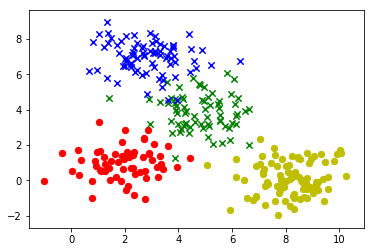

In [3]:
plt.scatter(x0, y0, c='r', marker='o', s=40)
plt.scatter(x1, y1, c='g', marker='x', s=40)
plt.scatter(x2, y2, c='b', marker='x', s=40)
plt.scatter(x3, y3, c='y', marker='o', s=40)

plt.show()

###  Combine the data into a single tensor.

In [4]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

feature_xy = np.vstack((d0, d1, d2, d3))

In [5]:
#   show shape of feature_xy
feature_xy.shape

(300, 2)

### Make one-hot encoding of the (desired) target classes

In [6]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

### Shuffle the data points (and corresponding classes)
### to avoid skewing the learning.

In [7]:
indices = np.arange(feature_xy.shape[0])

np.random.shuffle(indices)

feature_xy = feature_xy[indices, :]

expected_class = expected_class[indices, :]

### The usual.

In [8]:
import tensorflow as tf

/Users/nikhilkatukuri/Desktop/anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Hyper-parameters.   Play with these, to see if they make a difference.

In [9]:
learning_rate = 0.03
training_epochs = 10000

num_classes = 4
batch_size = 100

###  The feature tensor shape.

In [10]:
training_size, num_features = feature_xy.shape

###  1. Make placeholders X and Y for model inputs and corresponding desired classes.

In [11]:
X = tf.placeholder(tf.float32,[None,2])
Y = tf.placeholder(tf.float32,[None,4])

### 2. Make variables W and b for the weights and biases of the TensorFlow model.

In [12]:
W = tf.Variable(tf.zeros([2,4]))
b = tf.Variable(tf.zeros([4]))

###  3. Define the model, i.e. the model output.  I just call it model.
###      Use the sigmoid activation. Softmax the output, of course.

In [13]:
model = tf.nn.softmax(tf.nn.sigmoid(tf.add(tf.matmul(X,W), b)))

### 4. Define the loss (cost) function as the cross-entropy 
### between desired class and actual class computed by model.

In [14]:
loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model),reduction_indices=1))

### 5. Define minimizer for the loss function.

In [15]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 6. Make the Session object, and
###     initialize global variables.

In [16]:
init = tf.global_variables_initializer()

In [17]:
sess = tf.Session()

In [18]:
sess.run(init)

### The batch training

In [19]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    batch_data = feature_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: batch_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)

0 1.3862948
200 1.1396185
400 1.0640599
600 1.0380889
800 1.0653119
1000 1.0081663
1200 0.99095994
1400 1.0342774
1600 0.98669344
1800 0.96933854
2000 1.0150837
2200 0.97327864
2400 0.9546249
2600 1.000498
2800 0.96314394
3000 0.94339544
3200 0.98883665
3400 0.9549814
3600 0.9344484
3800 0.9793162
4000 0.94820464
4200 0.9271479
4400 0.9714247
4600 0.9424671
4800 0.9210832
5000 0.9647909
5200 0.9375348
5400 0.9159666
5600 0.9591386
5800 0.93323946
6000 0.9115897
6200 0.9542606
6400 0.92945635
6600 0.9077985
6800 0.95000076
7000 0.92609084
7200 0.90447736
7400 0.94624025
7600 0.9230702
7800 0.9015385
8000 0.94288766
8200 0.9203376
8400 0.8989141
8600 0.9398725
8800 0.9178484
9000 0.89655167
9200 0.937139
9400 0.9155668
9600 0.89440936
9800 0.9346435
10000 0.91346395
10200 0.89245415
10400 0.93235064
10600 0.91151613
10800 0.89065933
11000 0.93023187
11200 0.90970415
11400 0.88900316
11600 0.9282641
11800 0.9080117
12000 0.88746756
12200 0.9264284
12400 0.9064253
12600 0.8860379
12800 0.9

###  7. Show the weights and biases obtained for the model, after training.

In [20]:
W

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32_ref>

In [21]:
learned_w = sess.run(W)

In [22]:
print(learned_w)

[[-1.405062  -0.2914155 -2.445608   1.3151292]
 [-1.0732813  2.66165    2.5334601 -2.5686588]]


In [23]:
b

<tf.Variable 'Variable_1:0' shape=(4,) dtype=float32_ref>

In [24]:
learned_b = sess.run(b)

In [25]:
print(learned_b)

[ 7.1804366 -3.574995  -2.4943066 -3.3322592]


###  Make a few predictions.

In [26]:
feed_dict = { X: [[8.0,-1.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[3]


In [27]:
feed_dict = { X: [[5.0,2.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[1]


In [28]:
feed_dict = { X: [[-3.0,5.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[2]


In [29]:
feed_dict = { X: [[0.0,0.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[0]


### Making an accuracy node.

In [30]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### Use on the original data.

In [31]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy, Y: expected_class})

In [32]:
print(training_accuracy)

[0.7]


### 8. Make test data similar to the provided data above.
###     Just 10 datapoints for each of the 4 classes.

In [33]:
# red class  =  class 0

x0 = np.random.normal(3, 3, (10, 1))
y0 = np.random.normal(5, 3, (10, 1))

# green class  =  class 1

x1 = np.random.normal(7, 3, (10, 1))
y1 = np.random.normal(2, 3, (10, 1))

# blue class  =  class 2

x2 = np.random.normal(8, 3, (10, 1))
y2 = np.random.normal(1, 3, (10, 1))

# yellow class  =  class 3

x3 = np.random.normal(6, 3, (10, 1))
y3 = np.random.normal(4, 3, (10, 1))




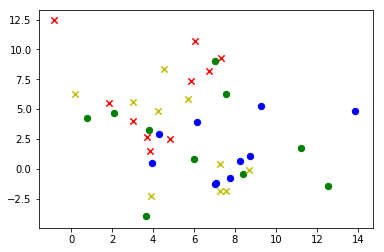

In [34]:
plt.scatter(x0, y0, c='r', marker='x', s=40)
plt.scatter(x1, y1, c='g', marker='o', s=40)
plt.scatter(x2, y2, c='b', marker='o', s=40)
plt.scatter(x3, y3, c='y', marker='x', s=40)

plt.show()

In [35]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

test_xy= np.vstack((d0, d1, d2, d3))

In [36]:
test_xy.shape

(40, 2)

###  9. Run the training on the test data.

In [37]:
training_size, num_features = test_xy.shape

In [38]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

In [39]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    test_data = test_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: test_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)

0 1.5708828
200 1.5398535
400 1.5147091
600 1.4650052
800 1.4231989
1000 1.4148304
1200 1.412289
1400 1.4003936
1600 1.3940164
1800 1.3897252
2000 1.3856654
2200 1.3849497
2400 1.384502
2600 1.3841177
2800 1.3837693
3000 1.3834448
3200 1.3831362
3400 1.3828356
3600 1.3825368
3800 1.382233


###  10. Use accuracy node on your test data.

In [40]:
training_accuracy = sess.run([accuracy], feed_dict={X: test_xy, Y: expected_class})

In [41]:
print(training_accuracy)

[0.3]
